## How can Boston Airbnb hosts earn more money from their properties?

The Project follows the CRISP-DM Process while analyzing the data.

## Business Understanding

We will be focusing on the listing dataset based on the three questions related to how Boston Airbnb hosts can earn more money from their properties:

1. Are neighborhoods in high demand the least expensive neighborhoods?
2. How can you become a superhost? What are the requirements to earn a superhost status? 
3. What factors increases the value of my listing?

# Data Understanding

In [196]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#load the data
lis = pd.read_csv('listings.csv')

In [197]:
#shape of the data frame: 3585 columns and 95 rows
lis.shape

(3585, 95)

In [198]:
# check the data type of the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # show all contents in a series
    print(lis.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [199]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,nan,f,nan,nan,f,moderate,f,f,1,nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.00,f,nan,nan,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.00,f,nan,nan,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.00,f,nan,nan,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.00,f,nan,nan,f,flexible,f,f,1,2.25


 # Data Preparation
 

In [200]:
#Drop id and other columns unrelated to the business questions
lis = lis.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about','host_thumbnail_url','host_picture_url', 'host_neighbourhood', 
       'host_total_listings_count', 'host_verifications','host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street','neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'amenities', 
       'security_deposit','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated','calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review','requires_license',
       'license', 'jurisdiction_names','instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'], axis=1)
    
    

In [201]:
#confirm that irrelevant columns have been dropped
lis.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'neighbourhood', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'cleaning_fee', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [202]:
#check to see if any of the columns need a data type transformation
lis.dtypes

host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
neighbourhood                   object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
square_feet                    float64
price                           object
weekly_price                    object
monthly_price                   object
cleaning_fee                    object
has_availability               float64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location   

In [203]:
#Tranform numeric string data to float
lis['monthly_price'] = pd.to_numeric(lis['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
lis['weekly_price'] = pd.to_numeric(lis['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
lis['price'] = pd.to_numeric(lis['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
lis['cleaning_fee'] = pd.to_numeric(lis['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
lis['host_response_rate'] = pd.to_numeric(lis['host_response_rate'].apply(lambda x: str(x).replace('%', '')),errors='coerce')
lis['host_acceptance_rate'] = pd.to_numeric(lis['host_acceptance_rate'].apply(lambda x: str(x).replace('%', '')),errors='coerce')

In [204]:
lis.head(10)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,accommodates,bathrooms,bedrooms,beds,bed_type,...,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,NaN,nan,nan,f,Roslindale,4,1.50,2.00,3.00,Real Bed,...,0,0,0,nan,nan,nan,nan,nan,nan,nan
1,within an hour,100.00,100.00,f,Roslindale,2,1.00,1.00,1.00,Real Bed,...,54,84,359,94.00,10.00,9.00,10.00,10.00,9.00,9.00
2,within a few hours,100.00,88.00,t,Roslindale,2,1.00,1.00,1.00,Real Bed,...,46,61,319,98.00,10.00,9.00,10.00,10.00,9.00,10.00
3,within a few hours,100.00,50.00,f,NaN,4,1.00,1.00,2.00,Real Bed,...,16,26,98,100.00,10.00,10.00,10.00,10.00,10.00,10.00
4,within an hour,100.00,100.00,t,Roslindale,2,1.50,1.00,2.00,Real Bed,...,34,59,334,99.00,10.00,10.00,10.00,10.00,9.00,10.00
5,within a few hours,100.00,95.00,t,Roslindale,2,1.00,1.00,1.00,Real Bed,...,28,58,58,100.00,10.00,10.00,10.00,10.00,9.00,10.00
6,within an hour,98.00,96.00,f,NaN,3,1.00,1.00,2.00,Real Bed,...,39,69,344,90.00,10.00,10.00,10.00,10.00,9.00,9.00
7,within a few hours,100.00,100.00,t,Roslindale,2,2.00,1.00,1.00,Real Bed,...,60,90,365,96.00,10.00,10.00,10.00,10.00,10.00,10.00
8,within an hour,100.00,100.00,t,Roslindale,2,1.00,1.00,2.00,Real Bed,...,42,72,347,96.00,10.00,10.00,10.00,10.00,9.00,10.00
9,within an hour,100.00,100.00,t,Roslindale,5,1.00,2.00,2.00,Real Bed,...,50,80,107,94.00,10.00,9.00,10.00,10.00,9.00,9.00


## Question 1: Are neighborhoods in high demand the least expensive neighborhoods?

Prospective hosts are usually interested in finding out the best neighborhoods to own a property. They want to know what neighborhoods are in high demand on Airbnb so that they can invest and earn more money.


In [205]:
#determine the number of airbnb requests by Boston neighborhoods
lis.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Downtown                8
Brookline               8
Leather District        8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [206]:
#select the Top 10 neighboorhood
lis_neighbourhood_top_10 = lis.neighbourhood.value_counts().nlargest(10)
lis_neighbourhood_top_10

Allston-Brighton    364
Jamaica Plain       314
South End           298
Back Bay            291
Fenway/Kenmore      249
South Boston        216
Dorchester          195
Beacon Hill         174
North End           125
East Boston         117
Name: neighbourhood, dtype: int64

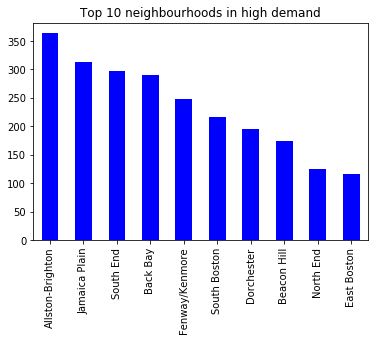

In [207]:
#Plot the top 10 neighborhood by demand
(lis.neighbourhood.value_counts().nlargest(10)).plot(kind="bar", color= "blue");
plt.title("Top 10 neighbourhoods in high demand");

In [208]:
#Determine the average listing price by neighborhood
neightborhood_price = lis.groupby(['neighbourhood']).mean()['price'].sort_values().dropna()
neightborhood_price

neighbourhood
Chestnut Hill         70.75
Mattapan              72.00
Somerville            93.08
Hyde Park             93.68
Dorchester            97.45
Roslindale            99.16
West Roxbury         111.34
Allston-Brighton     114.16
East Boston          124.06
Mission Hill         127.81
Brookline            130.38
Jamaica Plain        140.69
Roxbury              147.64
North End            195.51
Downtown             196.50
Cambridge            203.00
Government Center    205.33
South End            206.72
Charlestown          210.05
Beacon Hill          212.08
West End             221.60
Fenway/Kenmore       230.10
South Boston         232.12
Theater District     234.15
Chinatown            235.41
Back Bay             245.46
Leather District     245.88
Downtown Crossing    273.50
Financial District   283.69
Harvard Square       359.00
Name: price, dtype: float64

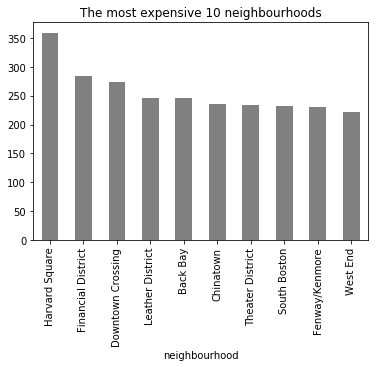

In [209]:
#Plot the top 10 most expensive neighborhood
(neightborhood_price.nlargest(10)).plot(kind="bar", color= "grey");
plt.title("The most expensive 10 neighbourhoods");

# Question 2: How can you become a superhost?

Boston Airbnb hosts probably wonder why some hosts are superhost and while others are not. What characteristics represents a superhost? Your overall review score is important including the breakdown of ratings in cleanliness, accuracy, checkin, communication, location, and value.



In [210]:
#filter data to view characteristics of a super host
lis[lis.host_is_superhost== 't']

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,accommodates,bathrooms,bedrooms,beds,bed_type,...,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,within a few hours,100.00,88.00,t,Roslindale,2,1.00,1.00,1.00,Real Bed,...,46,61,319,98.00,10.00,9.00,10.00,10.00,9.00,10.00
4,within an hour,100.00,100.00,t,Roslindale,2,1.50,1.00,2.00,Real Bed,...,34,59,334,99.00,10.00,10.00,10.00,10.00,9.00,10.00
5,within a few hours,100.00,95.00,t,Roslindale,2,1.00,1.00,1.00,Real Bed,...,28,58,58,100.00,10.00,10.00,10.00,10.00,9.00,10.00
7,within a few hours,100.00,100.00,t,Roslindale,2,2.00,1.00,1.00,Real Bed,...,60,90,365,96.00,10.00,10.00,10.00,10.00,10.00,10.00
8,within an hour,100.00,100.00,t,Roslindale,2,1.00,1.00,2.00,Real Bed,...,42,72,347,96.00,10.00,10.00,10.00,10.00,9.00,10.00
9,within an hour,100.00,100.00,t,Roslindale,5,1.00,2.00,2.00,Real Bed,...,50,80,107,94.00,10.00,9.00,10.00,10.00,9.00,9.00
11,within an hour,100.00,89.00,t,Roslindale,1,1.00,1.00,1.00,Real Bed,...,36,66,341,94.00,9.00,10.00,10.00,10.00,9.00,9.00
18,within a day,100.00,100.00,t,Roslindale,1,1.00,1.00,1.00,Real Bed,...,0,20,295,nan,nan,nan,nan,nan,nan,nan
19,within a day,100.00,100.00,t,NaN,2,1.00,1.00,1.00,Real Bed,...,0,0,262,95.00,9.00,10.00,10.00,10.00,9.00,10.00
20,within a few hours,100.00,94.00,t,Roslindale,1,2.50,1.00,1.00,Real Bed,...,27,57,332,99.00,10.00,10.00,10.00,10.00,9.00,10.00


In [211]:
#Create a list of columns that are related to examining the requirements for a superhost
SuperHost_req= lis[['host_response_rate', 'host_acceptance_rate', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [212]:
#calculate the descriptive statistics for superhost requirement
SuperHost_req.describe()

,host_response_rate,host_acceptance_rate,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,"3,114.00","3,114.00","3,585.00","3,585.00","3,585.00","3,585.00","2,772.00","2,762.00","2,767.00","2,765.00","2,767.00","2,763.00","2,764.00"
mean,94.99,84.17,8.65,21.83,38.56,179.35,91.92,9.43,9.26,9.65,9.65,9.41,9.17
std,12.52,21.78,10.44,21.86,33.16,142.14,9.53,0.93,1.17,0.76,0.74,0.90,1.01
min,0.00,0.00,0.00,0.00,0.00,0.00,20.00,2.00,2.00,2.00,4.00,2.00,2.00
25%,97.00,71.00,0.00,0.00,0.00,19.00,89.00,9.00,9.00,9.00,9.00,9.00,9.00
50%,100.00,94.00,4.00,16.00,37.00,179.00,94.00,10.00,10.00,10.00,10.00,10.00,9.00
75%,100.00,100.00,15.00,40.00,68.00,325.00,98.25,10.00,10.00,10.00,10.00,10.00,10.00
max,100.00,100.00,30.00,60.00,90.00,365.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00


The data suggests the following criteria for becoming a superhost:
1. Host guests for 179 days a year on average 
2. On average, maintain a 95% response rate
3. Have an average of 92% 5-star reviews
4. Honor confirmed reservations 84% of the time
5. Have a guest rating of 9.7 for check-in and communication
6. Have a guest rating of 9.3 for cleanliness
7. Have a guest rating of 9.4 for accuracy and location
8. Have a guest rating of 9.2 for value

In [213]:
#comparing the listing price for superhost vs non-superhost
lis.groupby(['host_is_superhost']).mean()['price'].sort_values()

host_is_superhost
f   173.60
t   176.43
Name: price, dtype: float64

# Question 3: What factors increases the value of my listing?

As a Boston Airbnb host, you may be wondering how you can increase the value of your property. We are using the listing price as a measure of value.

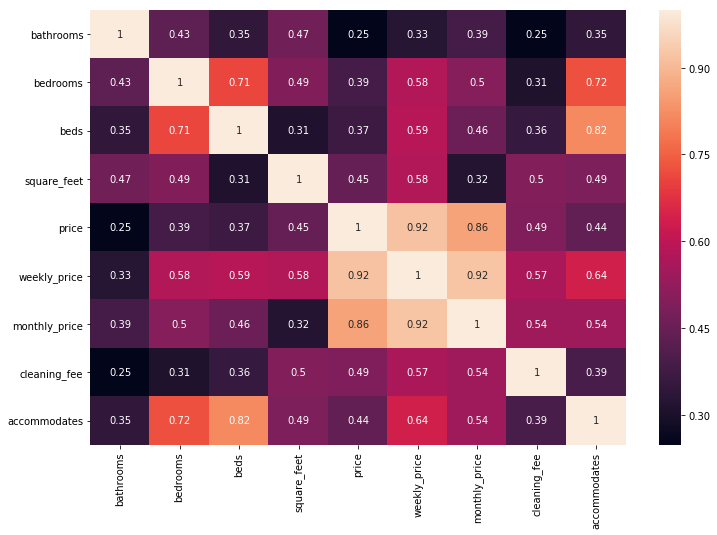

In [214]:
#calculate a correlation matrix to determine which quantitative variables relates with price
lis.corr
pd.options.display.float_format = '{:,.2f}'.format
plt.figure(figsize=(12,8))
#sns.heatmap(lis.corr(), annot=True)
sns.heatmap(lis[['bathrooms', 'bedrooms', 'beds','square_feet', 'price', 'weekly_price', 'monthly_price','cleaning_fee','accommodates']].corr(), annot=True)
plt.show()           

I dont want to use the weekly and monthly prices in the regression model as they are highly correlated to price.I am using the remaining features to estimate the regression model. Beds, bedrooms and accommodates have fairly high linear relationship, but I will keep them in the model.

In [215]:
#create a new dataset called listing by excluding weekly prices and monthly prices
listing = lis[['bathrooms', 'bedrooms', 'beds','square_feet', 'price','cleaning_fee','accommodates']]

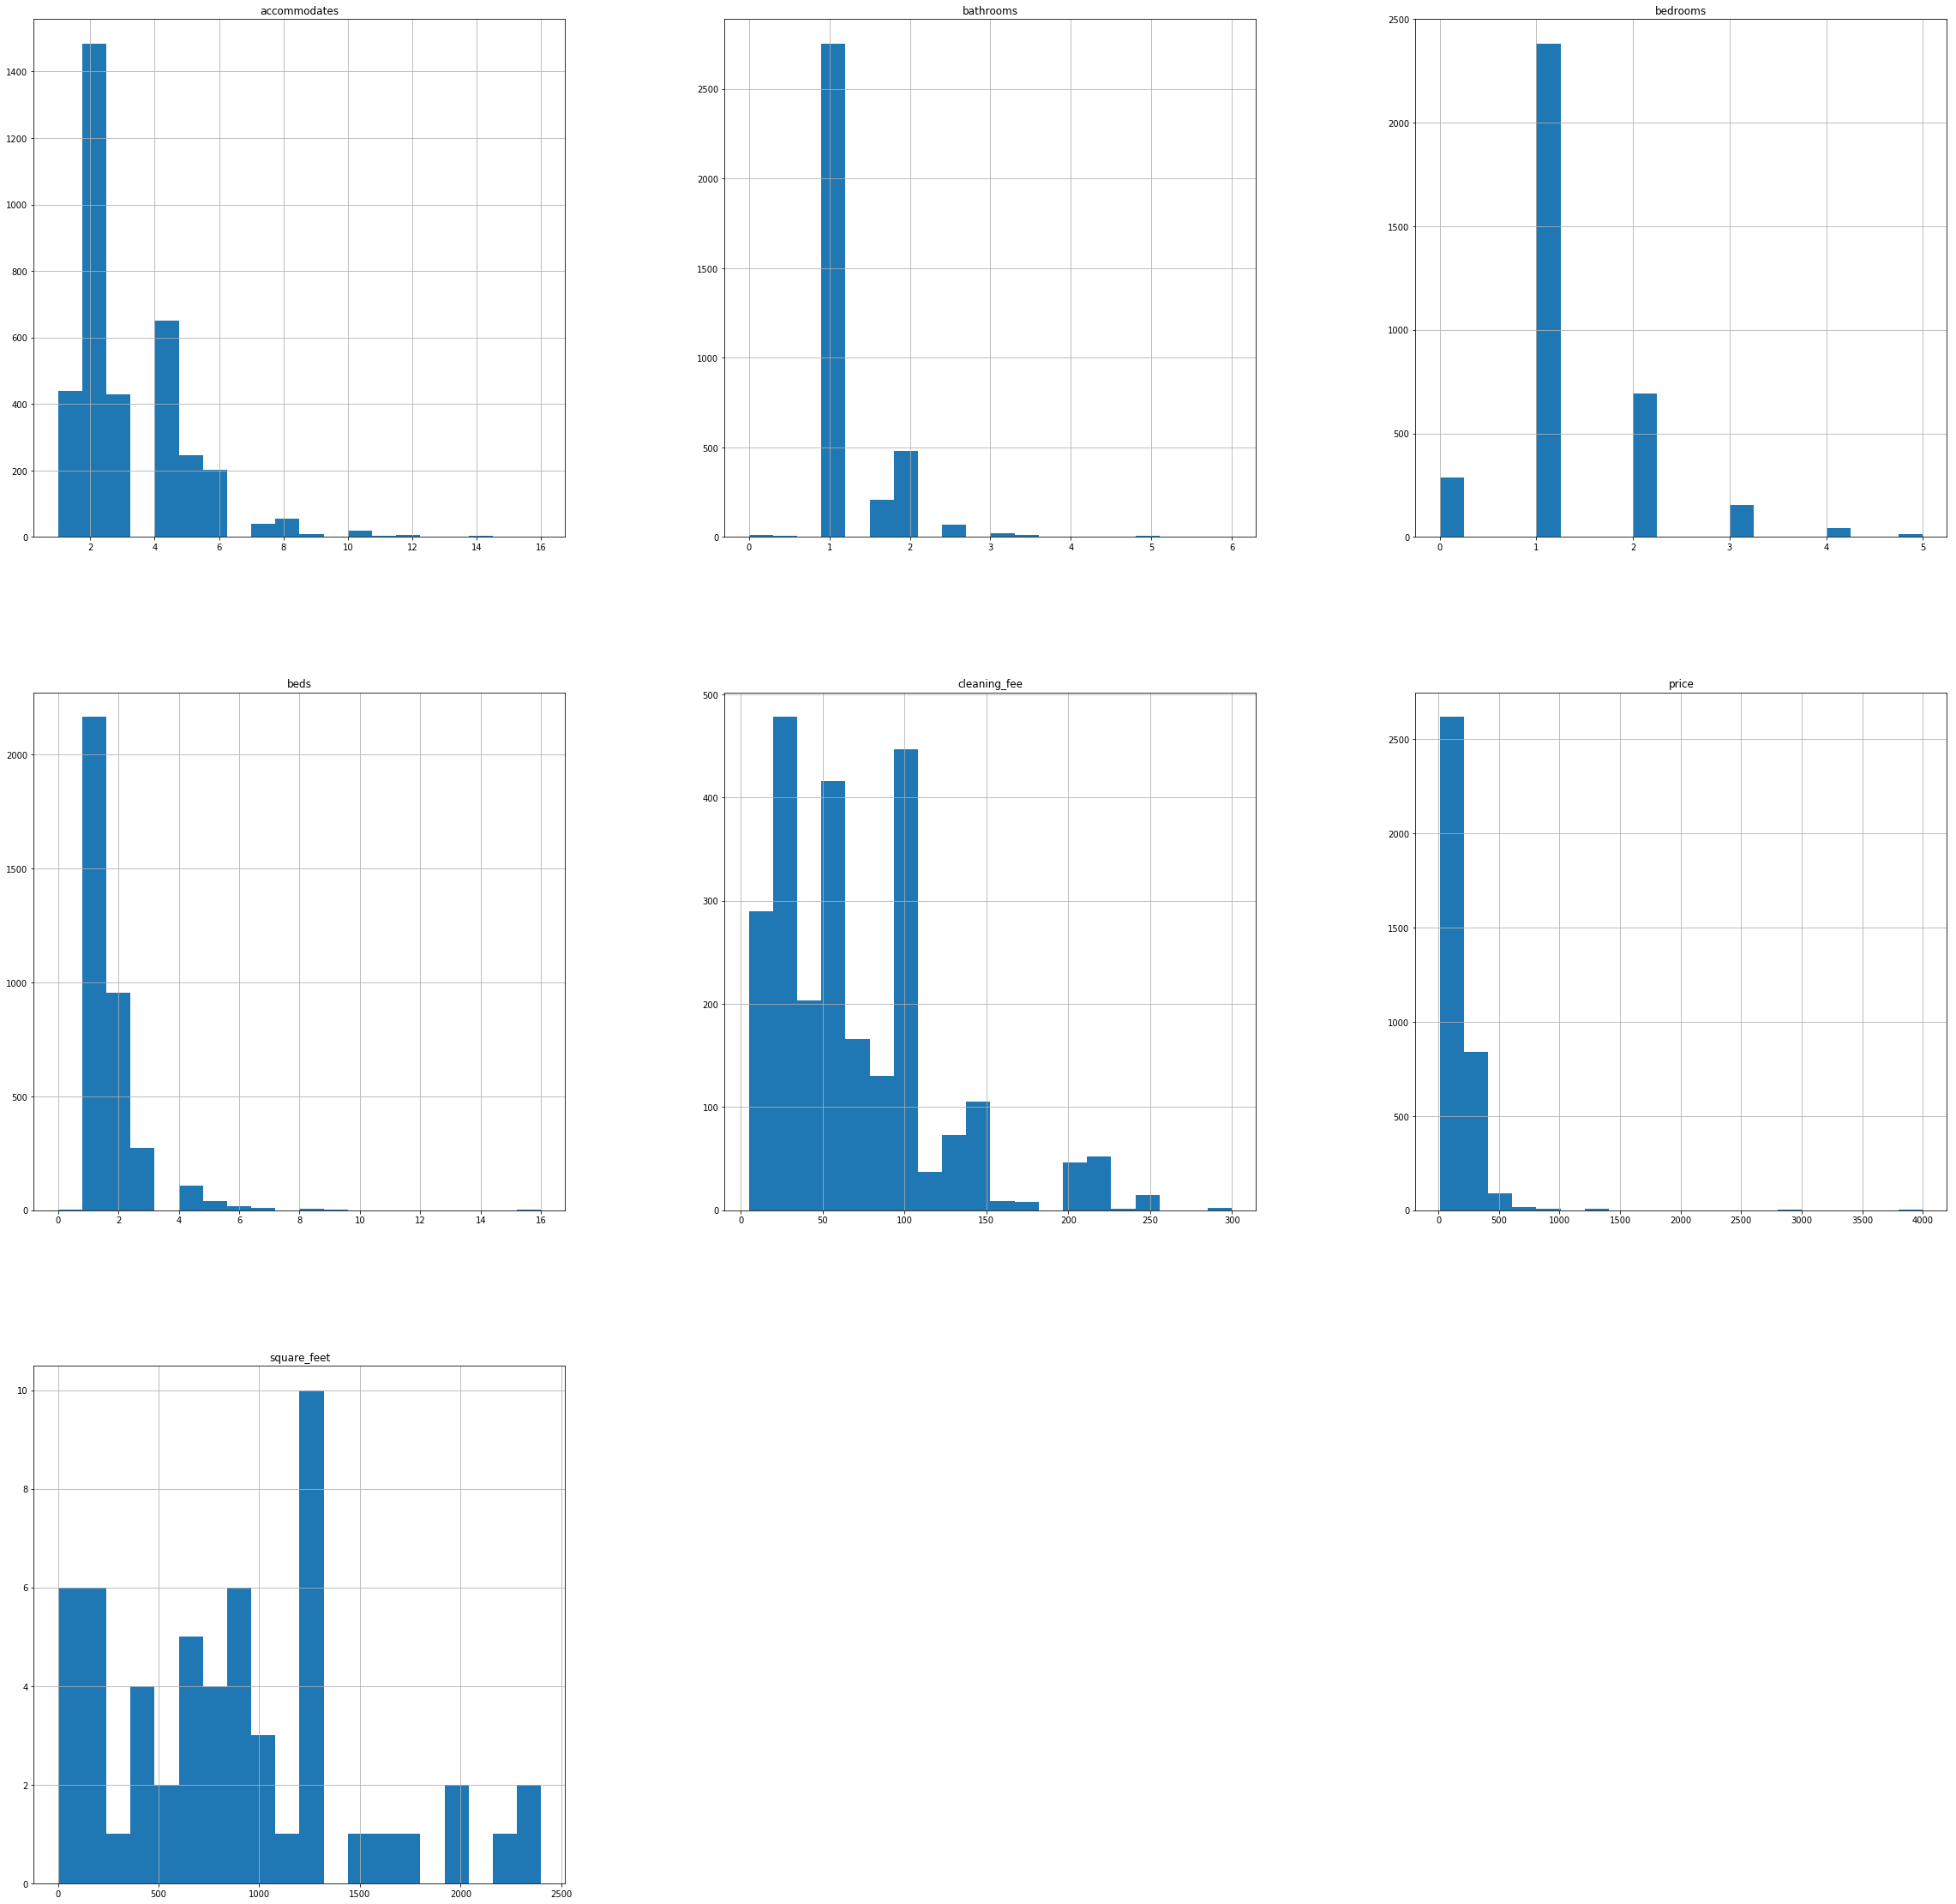

In [216]:
#run a histogram
listing.hist(bins=20, figsize=(40,40));

In [220]:
#calculate the descriptive statistics for the listing dataset
listing.describe()

,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,accommodates
count,"3,571.00","3,575.00","3,576.00",56.00,"3,585.00","2,478.00","3,585.00"
mean,1.22,1.26,1.61,858.46,173.93,68.38,3.04
std,0.50,0.75,1.01,608.87,148.33,51.30,1.78
min,0.00,0.00,0.00,0.00,10.00,5.00,1.00
25%,1.00,1.00,1.00,415.00,85.00,25.00,2.00
50%,1.00,1.00,1.00,825.00,150.00,50.00,2.00
75%,1.00,2.00,2.00,"1,200.00",220.00,100.00,4.00
max,6.00,5.00,16.00,"2,400.00","4,000.00",300.00,16.00


They are some missing values in the features above.The absence of data reduces the statistical power of the model and the representativenss of the samples.To handle missing values,I am using an imputation method by replacing the NaN values with the mean of the column before data modeling. However, we have to drop square feet because it has only 56 obersvations and 3529 missing values. Its missing value is greater than 50%.

In [221]:
#price is the same shape as the dataframe so no missing values
#drop square feet since 99% of its data is missing
new_listing=listing.drop(['square_feet'], axis = 1) 
new_listing          

,bathrooms,bedrooms,beds,price,cleaning_fee,accommodates
0,1.50,2.00,3.00,250.00,35.00,4
1,1.00,1.00,1.00,65.00,10.00,2
2,1.00,1.00,1.00,65.00,nan,2
3,1.00,1.00,2.00,75.00,50.00,4
4,1.50,1.00,2.00,79.00,15.00,2
5,1.00,1.00,1.00,75.00,30.00,2
6,1.00,1.00,2.00,100.00,nan,3
7,2.00,1.00,1.00,75.00,10.00,2
8,1.00,1.00,2.00,58.00,nan,2
9,1.00,2.00,2.00,229.00,50.00,5


In [222]:
# Fill missing values in  numeric columns with the mean
num_vars = new_listing.select_dtypes(include=['float', 'int']).columns
for col in num_vars: new_listing[col].fillna((new_listing[col].mean()), inplace=True)
no_nulls = set(new_listing.columns[new_listing.isnull().mean()==0]) #checking the imuptation method was applied
no_nulls

{'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'price'}

# Data Modeling

In [223]:
#import the necessary data modeling libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [224]:
X = new_listing[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee']] #independent variables
y = new_listing['price'] #target variable

In [225]:
X_constant = sm.add_constant(X) #We need to add a constant term to allow statsmodel.api to calculate the intercept.

In [226]:
pd.DataFrame(X_constant)

,const,accommodates,bathrooms,bedrooms,beds,cleaning_fee
0,1.00,4,1.50,2.00,3.00,35.00
1,1.00,2,1.00,1.00,1.00,10.00
2,1.00,2,1.00,1.00,1.00,68.38
3,1.00,4,1.00,1.00,2.00,50.00
4,1.00,2,1.50,1.00,2.00,15.00
5,1.00,2,1.00,1.00,1.00,30.00
6,1.00,3,1.00,1.00,2.00,68.38
7,1.00,2,2.00,1.00,1.00,10.00
8,1.00,2,1.00,1.00,2.00,68.38
9,1.00,5,1.00,2.00,2.00,50.00


In [227]:
sm.OLS

statsmodels.regression.linear_model.OLS

In [228]:
#model 1
model1 = sm.OLS(y, X_constant)

In [229]:
lr1 = model1.fit() #fitting the model

In [230]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     225.8
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          5.95e-210
Time:                        22:53:21   Log-Likelihood:                -22518.
No. Observations:                3585   AIC:                         4.505e+04
Df Residuals:                    3579   BIC:                         4.509e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.2028      6.351      1.292      0.197      -4.250      20.655
accommodates    24.1475      2.270     10.640      0.000      19.698      28.597
bathrooms       21.2184      4.812      4.410      0.000      11.784      30.653
bedrooms        22.5976      4.522      4.997      0.000      13.732      31.463
beds            -4.8102      3.874     -1.242      0.214     -12.406       2.786
cleaning_fee     0.6686      0.054     12.301      0.000       0.562       0.775
==============================================================================
Omnibus:                     6262.297   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12000877.049
Skew:                          11.887   Prob(JB):                         0.00
Kurtosis:                     285.445   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

The correlation matrix showed some fairly high correlation in accommodates, beds, and bedrooms, but I decided to use these features to model the data anyways. I am using Eigenvectors to detect for multicollinearity in these explanatory variables. Here, I want to determine if having accommodates, beds and bedrooms in the model has an impact on the individual predictors.My hypothesis is that bed, accommodates and bedrooms are highly correlated.

In [231]:
eigenvalues, eigenvectors = np.linalg.eig(X.corr())

In [232]:
pd.Series(eigenvalues).sort_values()

1   0.18
2   0.30
3   0.77
4   0.83
0   2.92
dtype: float64

Note that index 1, eigenvalue of 0.18, is near to zero or very small compared to the others. Small value represents presence of collinearity.

In [233]:
#examine index 1 to determine the presence of collinearity.
np.abs(pd.Series(eigenvectors[:,1])).sort_values(ascending=False)

0   0.74
3   0.67
2   0.07
4   0.04
1   0.02
dtype: float64

Index 0 and 3 are high values compared to the rest, they are the factors causing multicollinearity problem.

In [234]:
print(X.columns[0], X.columns[3]) 

accommodates beds


In [235]:
model = LinearRegression()

To my surprise, my hypothesis was wrong. Beds and accommodates are the variables causing multicollinearity. The next step is to determine which of the two variables will be selected for our updated model. We are going to identify the most important features in this model.

In [236]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
#identify key features
result = pd.DataFrame(list(zip(model.coef_, X.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
accommodates,24.15
bedrooms,22.60
bathrooms,21.22
beds,4.81
cleaning_fee,0.67


In [238]:
#To determine the impact of the variables properly, we need to standardise the variables
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler = StandardScaler()  
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [239]:
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, X.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False) #sort the significance of the standardize coefficient

,coefficient
name,
accommodates,42.95
cleaning_fee,28.51
bedrooms,16.99
bathrooms,10.62
beds,4.86


Since multicollinearity exists between accomodates and beds, I will create a second model to select accomodates as it is the most important of the two. 

In [240]:
#For model 2, I am excluding only beds
X2 = new_listing[['accommodates','bathrooms','bedrooms','cleaning_fee']]
y2 = new_listing['price']
X2_constant = sm.add_constant(X2)

In [241]:
sm.OLS
model2 = sm.OLS(y2, X2_constant)

In [242]:
lr2 = model2.fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     281.8
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          7.18e-211
Time:                        22:54:06   Log-Likelihood:                -22519.
No. Observations:                3585   AIC:                         4.505e+04
Df Residuals:                    3580   BIC:                         4.508e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.0666      6.351      1.270      0.204      -4.385      20.518
accommodates    22.4473      1.810     12.402      0.000      18.898      25.996
bathrooms       21.0011      4.809      4.367      0.000      11.572      30.430
bedrooms        21.0287      4.342      4.843      0.000      12.516      29.542
cleaning_fee     0.6657      0.054     12.258      0.000       0.559       0.772
==============================================================================
Omnibus:                     6259.043   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11971469.612
Skew:                          11.874   Prob(JB):                         0.00
Kurtosis:                     285.099   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results

Model 2 is selected as the final model to correct the multicollinearity problem. The results are summarized in the following bullet points: 

1. An increase in the number of bedroom in a Boston listed property, increases the price by approximately 21 dollars other factors held constant.
2. A 1 dollar increase in cleaning fee, increases the listing price by approximately 1 dollar other factors held constant.
3. An increase in the number of bathroom, increases the price by approximately 21 dollars other factors held constant. 
4. If a host can accommodate one more guest in his/her property, the price increases by approximately 22 dollars other factors held constant.

# Deployment

This model can be improved and deployed using advanced machine learning techniques such as XGBoost or Support Vector Machine Regression where training data and test data can be used to drive business insights and decision making process for Airbnb hosts. 